# An intro to quantum machine learning 🚀
(with one qubit!)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Since we will only use one qubit, we need to reduce the dimensionality of the data. For this, we will use Kernel PCA.

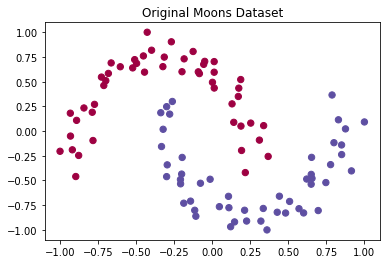

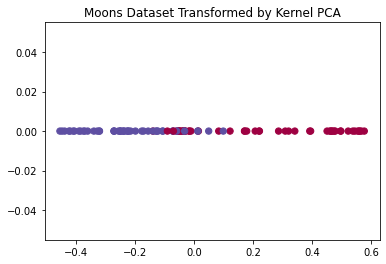

In [18]:
n_samples = 100

# Create the dataset
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# Preprocess the dataset
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

# Plot the original dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Original Moons Dataset")

# Plot the transformed dataset
plt.figure()
plt.scatter(X_kpca, np.zeros_like(X_kpca), c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Moons Dataset Transformed by Kernel PCA")

plt.show()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Variational Quantum Classifier

In [24]:
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit import ParameterVector, Parameter, QuantumCircuit
from qiskit.circuit.library import TwoLocal

from utils import statevectors_for_circuit, bloch_sphere_statevector_figure

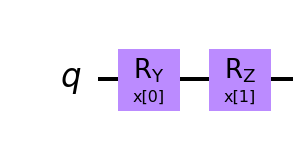

In [25]:
def build_layered_model_circuit(n_layers = 1):
    """Credits to Maxime Dion"""

    data_params = ParameterVector('x', 2)

    model_circuit = QuantumCircuit(1)
    model_circuit.ry(data_params[0],0)
    model_circuit.rz(data_params[1],0)
    
    return model_circuit

build_layered_model_circuit().draw('mpl',scale = 2)

In [26]:
statevectors = statevectors_for_circuit(build_layered_model_circuit(), X_train)
fig = bloch_sphere_statevector_figure(statevectors , y_train)
fig.show()


In [27]:
var_form = TwoLocal(num_qubits, ['rz', 'ry'], 'cz', reps=3, insert_barriers=True)
print(var_form.decompose())

NameError: name 'num_qubits' is not defined

In [173]:
optimizer = SPSA(maxiter=40)
vqc = VQC(num_qubits, 
        feature_map, 
        ansatz = var_form, 
        loss = 'cross_entropy',
        optimizer = optimizer, 
)

In [174]:
vqc.fit(X_train, y_train)

In [175]:
test_accuracy = vqc.score(X_test, y_test)
print(f'Testing success ratio: {test_accuracy}')

Testing success ratio: 0.6333333333333333


In [186]:
fig = bloch_sphere_statevector_figure(statevectors , y_train)
fig.show()

In [125]:
y_train[0]

0

In [77]:
from utils import plot_decision_boundary
plot_decision_boundary(vqc, X, y, pad=0.1)

KeyboardInterrupt: 

## Quantum Support Vector Machine

In [27]:
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [28]:
# Initialize the quantum kernel
kernel = FidelityQuantumKernel(feature_map=ZFeatureMap(feature_dimension=1, reps=2))


In [29]:
qsvc = QSVC(quantum_kernel=kernel)

In [30]:
# fit the model
qsvc.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x29e86e020>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [31]:
test_accuracy = qsvc.score(X_test, y_test)
print(f'Testing success ratio: {test_accuracy}')

Testing success ratio: 0.7333333333333333
